# Homework 2 - Linear Regression

Jackie Wang

## PART A: Concepts

1. Model Setup

    a.State the simple linear regression (SLR) setup (ISLP Eq. 3.1) and define each term in the equation.

    yi​=β0​+β1​xi​+ϵi

    yi is the response (output)

    Xi is the predictor (input)

    Bo is the intercept

    B1 is the slope

    e is the random error

    b.List and briefly explain the basic assumptions of the SLR model.

    - Linearlity: Assumption of SLR is that the relationship between the predictor x and the response y have a linaer relationship. 
    - Independ Erros: The error e are independent of each other / erros are uncorrelated
    - Constant variance: the errors have the same variance across the values x
    - the errors are normally distributed with mean 0


2. Model fitting. In your own words, explain how the coefficients of the SLR model are estimated (i.e., how we “fit” the model). 

Coefficients are estimating the best intercept and slope so that the resulting line are as close to our features/data points as possible. In SLR we would get this by minimizing the Residual Sum Of Squares (RSS) total squared differnce between the observed values and the predicted values/  y- yhat.


3. Interpretation. In your own words…

a. Explain the difference between the population regression line and the least squares line.

The population line represents the true relationship between X and Y in the entire data. It uses unknown data. 

Least Square Lines are the estimated lines based on our sample data. It trys to find the relationship between our coefficients. And it gets the best estimiate data line. 

b. Define the standard error and explain what it tells us about the estimated parameters.

The standard errors tells us the how close our estimated parameters are to the true parameters. 

c. Define confidence intervals and explain what it tells us about the estimated parameters.

Confidence intervals tell us how accurate our estimated parameters are. It provide a range of value for understanding how confident we are in the accuracy of our predictions. 



Applied example. Consider the SLR model: examScore0+1hoursStudied+

a. State the null and alternative hypotheses being tested in this model.

H0 null : Beta = 0 hour studied has no relationship with exam score
HA alternative: Beta does not equal to 0 hours does have a relationship with exam score

b. Interpret each coefficient: write one sentence for each coefficient explaining its meaning in context of the problem.

Interept (3.4): When a student studies 0 hrs their exam score is 3.4 points

HoursStudied (1.5): for each additonal studied the exam score is expected to increase by 1.5 points on avg.

c. Are the coefficients statistically significant? Explain how you came to that conclusion.

yes both p value are less than 0.001 which is smaller than 0.05 threshold. This mean that both coefficeints are statstically signifcant. 

d. Suppose the 95% confidence intervals (CIs) for 0=[1.8,5.0] and for 1=[1.1,1.9]. Write one sentence of interpretation for each CI in context.

0=[1.8,5.0] we are 95% confident that true avg exam score for students who study 0 hrs lies between 1.8 ad 5.0 points. 

1=[1.1,1.9] we are 95% confident that each additonal hr studied increase the true avg exam score by 1.1 and 1.9 points.

e. For your model, you compute RSE=5.2 and R2=0.62. Write one sentence for each metric that interprets it in the context of the problem.

RSE = 5.2 means the difference between actual score and predicted exam score is about 5.2 points.

R^2 - 0.62 means that 62% of the variation in exam score can be determined by the number of hrs studied.

## Lecture 5: Multiple Linear Regression

5. Model Setup 

a. State the multiple linear regression (MLR) setup (ISLP Eq. 3.19) and define each term in the equation.

yi​=β0​+β1​xi1​+β2​xi2​+⋯+βp​xip​+ϵi​

- yi: response variable
- xij: value of the jth predictor for the ith observation
- B0: intercept
- Bj: slope
- Ei: random error term

b. List and briefly explain the basic assumptions of the MLR model.

- The relationship between predictors and the response is linear.
- The errors are independent of one another.
- The errors have constant variance across all levels of the predictors.
- The errors are normally distributed with mean 0

6. Interpretation 

a. Explain why simple and multiple linear regression models might disagree about the relationship between a single predictor and the output.

Because we control the other variable in mlr setup. If predictors are correlated this could also impact the other predictor as well.

b. Describe how to interpret each coefficient j in the presence of other predictors.

Bj is the avg change in y in one unit increase in xj, while holding all the other predictors constant.

c. Explain what overall F-statistic tests for. Why might we look at the F-statistic in addition to individual p-values for individual predictors? 


F stats tests whether one of the predictors has a non zero coeffiecents whether the model is serve better without any predictors at all. We look for that in our p values as it can tell us whether the model is statistically significant. 


## Lecture 6 Other Consideration in Regression

7. Model assumptions and extensions.

a. Provide one example each of how the additivity and linearity assumptions of the linear regression model can be relaxed.

additivity: We can add more interaction terms to allow the effect of one predictor to depend on the other.

Linearity: We can include polunomial or nonlinaer transformation. 

8. Categorical predictors

a. Imagine that someone would like to predict house price from square footage, location  and number of bedrooms.


- regression model

housePrice = Beta0 + Beta1(squareFootage) + Beta2(location) + Beta3(numBedrooms) + e

- Explain one way you could code the qualitative (categorical) predictors in the regression model.

WE can do one hot encoding, by creaing 3 different categories one bedroom, two bedroom, and three bedroom 

we would create 2 variables and if they are indeed what they are they would turn into 1 if not they would equal to 0. And the last variable would be the baseline.


**Estimated completion time: 1.5 hours**

**Workflow:**
1) **EDA / exploratory checks** (scatterplots with LS lines)
2) **Fit SLR** with `statsmodels.api.OLS` (manual `add_constant`); interpret
3) **Diagnose SLR** (residuals vs. fitted)
4) **Fit MLR** with **backward selection** using `statsmodels.api.OLS` (numeric predictors only)
5) **Predict with `sklearn.linear_model.LinearRegression`** and compute **RMSE**
6) **Compare SLR vs MLR** on the same split

> **Comments marked **# YOUR CODE HERE** must be completed for the code to run

> **Please also make sure you are pasting your plots and answering any questions in the document in the **main homework document**, not in this notebook.

## Part 0 — Setup
### Importing packages

In [1]:
# If running locally and packages are missing, uncomment:
# !pip install -q ISLP statsmodels scikit-learn pandas numpy matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 140)

### Load the ISLP College dataset

In [2]:
College = None
err = None
try:
    from ISLP import load_data
    College = load_data('College')
except Exception as e:
    err = e

if College is None:
    try:
        from ISLP.datasets import load_data as load_data_alt
        College = load_data_alt('College')
    except Exception as e2:
        err = (err, e2)

if College is None:
    raise RuntimeError(f"Could not load College dataset. Error details: {err}")

df = College.copy()
df.columns = df.columns.str.replace(r'[^0-9a-zA-Z]+', '_', regex=True)
print(df.shape)
df.head()

(777, 18)


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## Part 1 — Exploratory data analysis

We will be modeling **`Outstate`** (out-of-state tuition, continuous) as a function of a chosen predictor.  
**Tasks**
- Print a short summary of `Outstate`.
- Show correlations between `Outstate` and several numeric predictors.
- Make **scatterplots with LS lines** for 2–4 top predictors to visually assess near-linearity.

In [3]:
target = 'Outstate'
assert target in df.columns, f"{target} not in columns; sample: {df.columns.tolist()[:12]}"
print(df[target].describe())

# Candidate numeric predictors (no qualitative variables such as 'Private')
candidates = [c for c in ['Top10perc','Room_Board','PhD','S_F_Ratio','Expend','Grad_Rate','perc_alumni','Terminal'] if c in df.columns]
if not candidates:
    candidates = [c for c in df.select_dtypes(include=[np.number]).columns if c != target][:8]

print("Candidate numeric predictors:", candidates)
corrs = df[[target]+candidates].corr(numeric_only=True)[target].sort_values(ascending=False)
print("Correlations with Outstate:\n", corrs)

count      777.000000
mean     10440.669241
std       4023.016484
min       2340.000000
25%       7320.000000
50%       9990.000000
75%      12925.000000
max      21700.000000
Name: Outstate, dtype: float64
Candidate numeric predictors: ['Top10perc', 'Room_Board', 'PhD', 'S_F_Ratio', 'Expend', 'Grad_Rate', 'perc_alumni', 'Terminal']
Correlations with Outstate:
 Outstate       1.000000
Expend         0.672779
Room_Board     0.654256
Grad_Rate      0.571290
perc_alumni    0.566262
Top10perc      0.562331
Terminal       0.407983
PhD            0.382982
S_F_Ratio     -0.554821
Name: Outstate, dtype: float64


### Pick 2–4 predictors for EDA plots

Set `top_nums` to a list of 2–4 column names from `candidates`.

In [4]:
top_nums = ['Top10perc', 'Room_Board','Expend']

assert isinstance(top_nums, (list,tuple)) and 1 <= len(top_nums) <= 4, "Choose 2–4 predictors"
for col in top_nums:
    assert col in df.columns, f"{col} must be in df"
print("Top predictors for EDA plots:", top_nums)

Top predictors for EDA plots: ['Top10perc', 'Room_Board', 'Expend']


### Create the scatterplots + LS lines

Loop over `top_nums`. One figure per predictor.

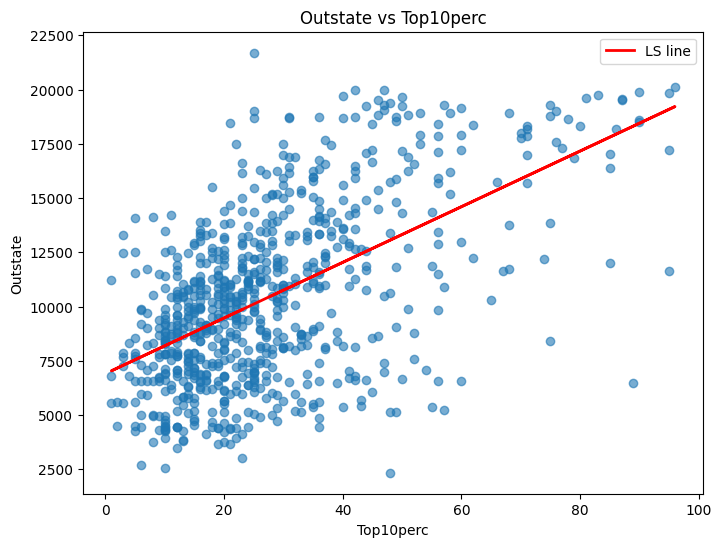

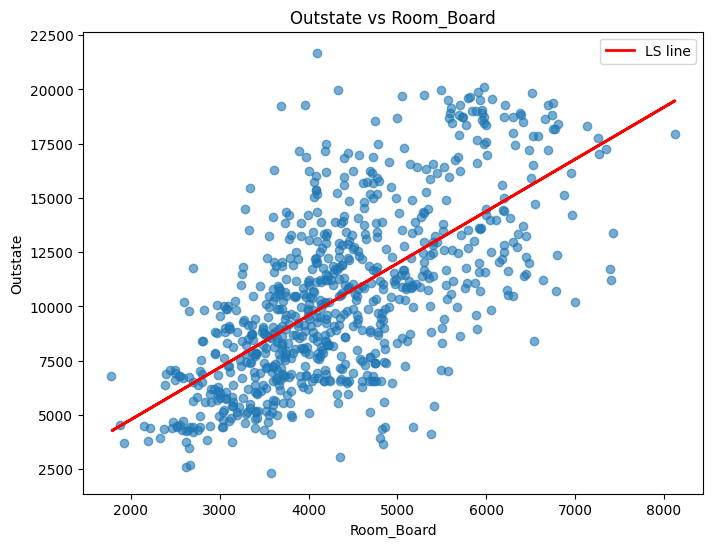

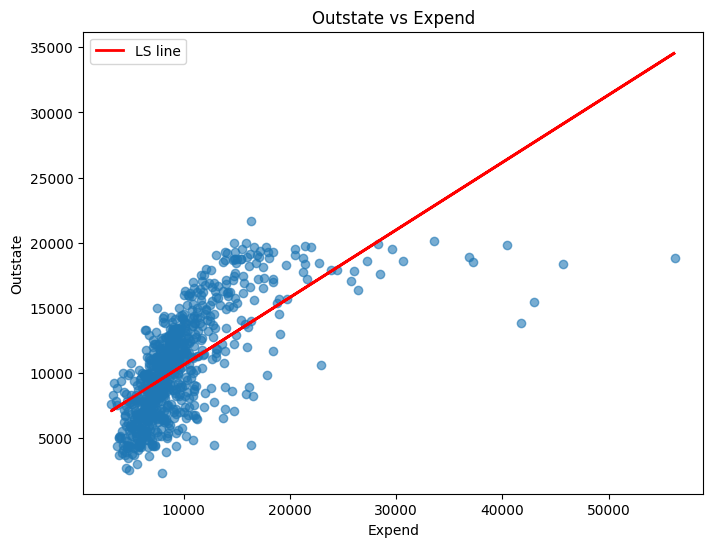

In [5]:
for x in top_nums:
    # Create scatter plot with least squares line
    plt.figure(figsize=(8, 6))
    plt.scatter(df[x], df[target], alpha=0.6)
    
    # Fit least squares line using numpy polyfit
    m, b = np.polyfit(df[x], df[target], 1) 
    plt.plot(df[x], m*df[x] + b, color='red', linewidth=2, label='LS line')
    
    plt.xlabel(x)
    plt.ylabel(target)
    plt.title(f'{target} vs {x}')
    plt.legend()
    plt.show()

3. Which predictors appear roughly linear with Outstate? Do you observe any curvature, clusters, or 
outliers?

Outstate vs Expend defintely appears to have a strongly strong linear relationship. 
They have the strongest positive linear relationship as the points are generally very close to the regression line and their a few outliers but they are the most correlated to each other.

## Part 2 — Fit the SLR (statsmodels OLS)

Pick **one** numeric predictor `x1` for SLR (may be one of `top_nums`; e.g., `Top10perc`). Set `x1` and run the assert.

In [6]:
x1 = 'Room_Board'
assert isinstance(x1, str) and (x1 in df.columns), f"x1 must be in df; consider: {candidates}"
print("x1 =", x1)

x1 = Room_Board


### Fit with statsmodels.api.OLS (manual add_constant) and interpret

1. Construct `X = sm.add_constant(x)` where `x = df[[x1]].values` and `y = df[target].values`.
2. Fit: `model = sm.OLS(y, X).fit()` and print `model.summary()`.
3. Compute **training RMSE** using **sklearn**: fit a `LinearRegression()` on the same `x` → predict; compute `rmse_slr = sqrt(MSE)`.
4. Make plots:
   - Scatter of `Outstate` vs `x1` with LS line
   - Residuals vs fitted (from `model`)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     580.0
Date:                Fri, 10 Oct 2025   Prob (F-statistic):           4.14e-96
Time:                        18:37:23   Log-Likelihood:                -7333.9
No. Observations:                 777   AIC:                         1.467e+04
Df Residuals:                     775   BIC:                         1.468e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.4453    447.768     -0.039      0.9

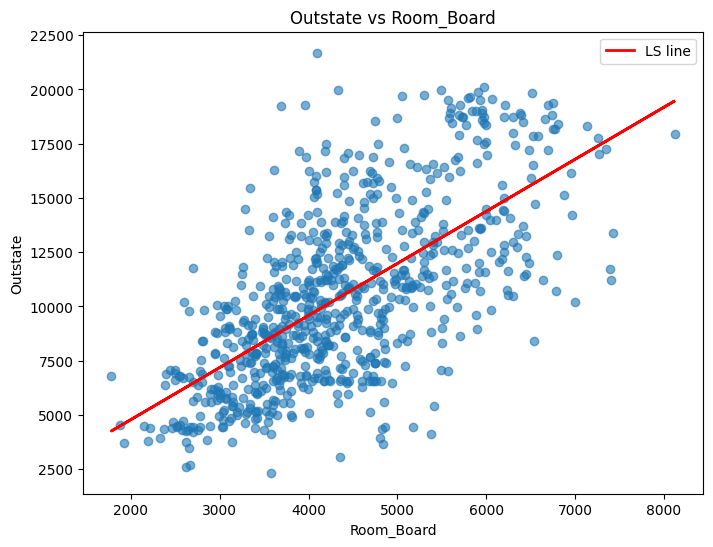

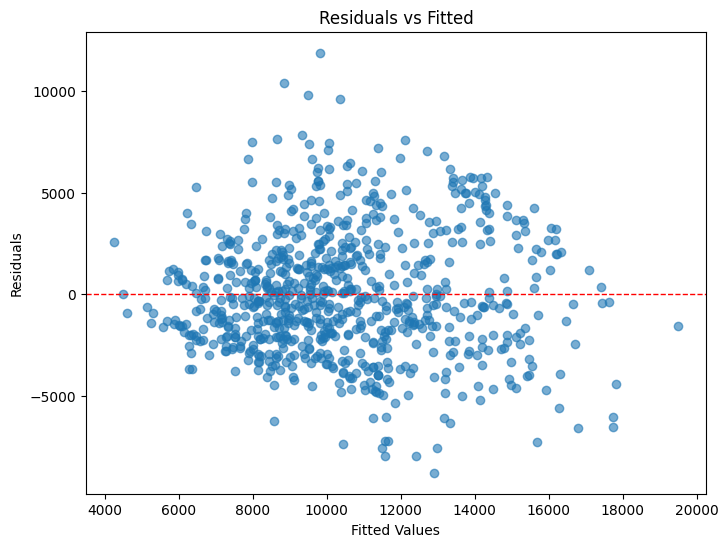

In [7]:
# 1) Design matrix
x = df[[x1]].values
y = df[target].values
X = sm.add_constant(x, has_constant = 'add')

# 2) Fit statsmodels OLS
model = sm.OLS(y,X).fit()
print(model.summary())

# 3) RMSE via sklearn LinearRegression
lr_slr = LinearRegression().fit(x, y)  
yhat = lr_slr.predict(x)
from math import sqrt
rmse_slr = sqrt(mean_squared_error(y, yhat))
print("SLR RMSE (training):", round(rmse_slr, 2))

# 4) Plots
# Scatter plot with LS line
plt.figure(figsize=(8, 6))
plt.scatter(x.flatten(), y, alpha=0.6)
m, b = lr_slr.coef_[0], lr_slr.intercept_
plt.plot(x.flatten(), m*x.flatten() + b, color='red', linewidth=2, label='LS line')
plt.xlabel(x1)
plt.ylabel(target)
plt.title(f'{target} vs {x1}')
plt.legend()
plt.show()

# Residuals vs fitted plot (using statsmodels predictions)
fitted_values = model.fittedvalues
residuals = model.resid
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

Do you see any violations of the linearity assumptions? Please comment.

No theres no obvious violation of the linearity assumptions.


## Part 3 — Fit the MLR with backward selection (statsmodels for p-values)

- Split data 70/30.
- Start with numeric predictors only (exclude qualitative variables).
- Use **statsmodels OLS** (with `sm.add_constant`) to compute p-values for backward selection on the **training** set.

In [8]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Numeric candidate pool (exclude the target)
numeric_pool = [c for c in ['Top10perc','Room_Board','PhD','S_F_Ratio','Expend','Grad_Rate','perc_alumni','Terminal'] if c in df.columns]
numeric_pool = [c for c in numeric_pool if c != target]
if not numeric_pool:
    numeric_pool = [c for c in df.select_dtypes(include=[np.number]).columns if c != target][:8]

print("Initial numeric candidate terms:", numeric_pool)

Initial numeric candidate terms: ['Top10perc', 'Room_Board', 'PhD', 'S_F_Ratio', 'Expend', 'Grad_Rate', 'perc_alumni', 'Terminal']


### Implement backward selection by p-value

Rules:
- Fit OLS with `sm.OLS(y_train, sm.add_constant(X_train[kept]))`.
- Use `model.pvalues` (drop `'const'`) to find the worst p-value.
- Drop the worst term if p > 0.05; stop otherwise.

In [10]:
def fit_sm_ols(X_df, y_series):
    X = sm.add_constant(X_df.values, has_constant='add')
    return sm.OLS(y_series.values, X).fit()

def backward_selection_by_p(train_df, response, terms, alpha_out=0.05):
    kept = terms.copy()
    while True:
        X_train = train_df[kept]
        y_train = train_df[response]
        model = fit_sm_ols(X_train, y_train)
        pvals = pd.Series(model.pvalues, index=['const']+kept).drop('const', errors='ignore')

        worst_term = pvals.idxmax()
        worst_p = pvals.max()

        if worst_p > alpha_out and len(kept) > 1:
            kept.remove(worst_term)
        else:
            break

    final_model = fit_sm_ols(train_df[kept], train_df[response])
    return kept, final_model

kept_terms, mlr_model_train = backward_selection_by_p(train_df, target, numeric_pool, alpha_out=0.05)
print("Selected terms:", kept_terms)
print(mlr_model_train.summary())

Selected terms: ['Room_Board', 'S_F_Ratio', 'Expend', 'Grad_Rate', 'perc_alumni']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     251.5
Date:                Fri, 10 Oct 2025   Prob (F-statistic):          3.98e-138
Time:                        19:06:03   Log-Likelihood:                -4951.0
No. Observations:                 543   AIC:                             9914.
Df Residuals:                     537   BIC:                             9940.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

### Answer Questions 6-8

**6. Review ISLP Chapter 3.2.2, especially "Two: Deciding on Important Variables." Briefly describe the three methods for selecting variables in a multiple regression model.**

The three main methods for variable selection in multiple regression are:

1. **Forward Selection**: Begins wi the null model a model that contains the intercept but have no predictors. We fit p simple linear regression and add the null model to th variable that results in the lowest RSS.

2. **Backward Selection**: Start with all variables in the model, and remove the variable with the largest p-value, the variable that is the least statistically significant. we remove the largest p value and replace that with the new (p-1) variable

3. **Mixed Selection (Forward/Backward)**: Combination of both forward and backward selection we continue performing forward and backward step until all variables in the model have sufficiently low p value.

**7. Which variables did the backward selection process keep? Write out your final MLR formula after backward selection.**

The backward selection process kept these variables: Room_Board, S_F_Ratio, Expend, Grad_Rate, and perc_alumni.

The final MLR formula is:
**Outstate = 539.59 + 1.29(Room_Board) - 120.66(S_F_Ratio) + 0.22(Expend) + 32.42(Grad_Rate) + 76.33(perc_alumni)**

**8. Interpret the final model output:**

**a. State the null and alternative hypotheses tested by the F-statistic in your final MLR model.**

H₀ (null): β₁ = β₂ = β₃ = β₄ = β₅ = 0 
H₁ (alternative): At least one βⱼ ≠ 0 

**b. Report the F-statistic and its p-value and explain what they imply about the model overall.**

F-statistic = 251.5, p-value = 3.98e-138 

Since the p-value is much smaller than 0.05, we reject the null hypothesis. 

**c. For each kept predictor, write one sentence interpreting the coefficient in context.**

- **Room_Board (1.29)**: When the other variables still constant, each additonal 1 dollar spent is equivalent to 1.29 dollar in out of  state increases

- **S_F_Ratio (-120.66)**: When the other variables still constant, a 1-unit increase in student-faculty ratio is equivalent to an average decrease of 120.66 in out-of-state tuition.

- **Expend (0.22)**: When the other variables still constant, a 1 dollar increase in instructional expenditure per student is equivalent to an average increase of $0.22 in out-of-state tuition.

- **Grad_Rate (32.42)**: When the other variables still constant, a 1 percentage point increase in graduation rate is equivalent to an average increase of $32.42 in out-of-state tuition.

- **perc_alumni (76.33)**: When the other variables still constant, a 1 percentage point increase in alumni donation rate is equivalent to  an average increase of 76.33 in out-of-state tuition.

## Part 4 — Predict with sklearn and report RMSE + visuals

- Fit a `LinearRegression()` on the **training** set using **only** the selected `kept_terms` (no manual constant).
- Compute **training RMSE** and **test RMSE**.
- Plot **Predicted vs Actual** (test) with a 45° line.
- Plot **Residuals vs Fitted** (test), using sklearn predictions.

MLR RMSE (train): 2205.84
MLR RMSE (test): 2219.18


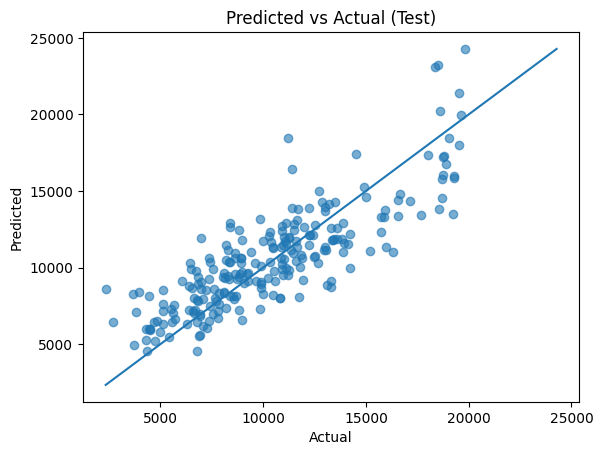

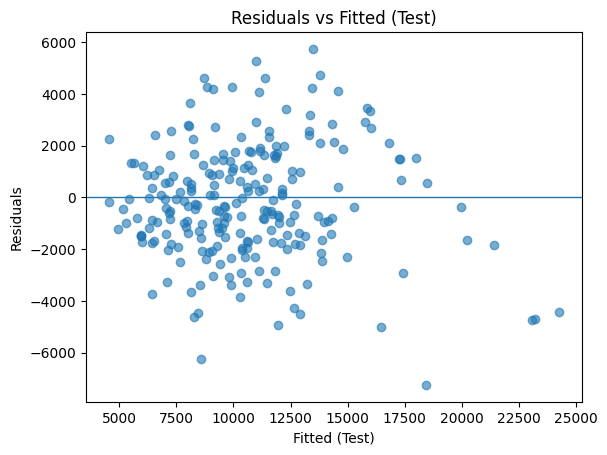

In [11]:
from math import sqrt
Xtr = train_df[kept_terms].values
ytr = train_df[target].values
Xte = test_df[kept_terms].values
yte = test_df[target].values
lr_mlr = LinearRegression().fit(Xtr, ytr)
yhat_tr = lr_mlr.predict(Xtr)
yhat_te = lr_mlr.predict(Xte)
rmse_train = sqrt(mean_squared_error(ytr, yhat_tr))
rmse_test = sqrt(mean_squared_error(yte, yhat_te))
print("MLR RMSE (train):", round(rmse_train,2))
print("MLR RMSE (test):", round(rmse_test,2))

plt.figure(); plt.scatter(yte, yhat_te, alpha=0.6)
lims = [min(yte.min(), yhat_te.min()), max(yte.max(), yhat_te.max())]
plt.plot(lims, lims); plt.xlabel("Actual"); plt.ylabel("Predicted"); plt.title("Predicted vs Actual (Test)"); plt.show()

resid_te = yte - yhat_te
plt.figure(); plt.scatter(yhat_te, resid_te, alpha=0.6); plt.axhline(0, linewidth=1)
plt.xlabel("Fitted (Test)"); plt.ylabel("Residuals"); plt.title("Residuals vs Fitted (Test)"); plt.show()

### Answer Questions 9-11

**9. What are your training and test RMSE values? Is there evidence of overfitting or underfitting? Explain briefly.**

Training RMSE: 2205.84

Test RMSE: 2219.18

This is a good model fit because the Training RMSE and the Test RMSE are similar to each other. 

**11. Summarize your findings:**

**a. Comment on the MLR model's accuracy and how well it predicts Outstate:**

The MLR model with 5 predictors (Room_Board, S_F_Ratio, Expend, Grad_Rate, perc_alumni) explains about 70% of the variance in outstae r^2 = .70 produces a typical prediction error of reougly 2.2k on both training and test sets  This show little evidence of overfitting. 

**b. Mention one limitation of your model and a next step you would take to improve it:**

**Limitation:** The model assumes linear relationships between predictors and the response, but some relationships might not be be linear. 

**Next step:** I would explore regularization techniques (Ridge/Lasso) to handle potential cases where the two features that are highly related to each another this can be troubling because if both features are similar to each other it is hard to find the differnce and make the right prediction.